# Detección de Outliers

En este _notebook_ exploraremos el uso de la técnica varias técnicas de detección de _outliers_. En concreto, veremos:

- DBSCAN (centrado en detección de _outliers_)
- Gaussian Mixture Models (GMM)
- K-Nearest Neighbors (KNN)
- Métodos basados en distancia (Euclidiana y Mahalanobis)

## DBSCAN

Vamos a partir con DBSCAN. Para esto vamos a crear un _dataset_ con un único _cluster_.

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

clusters = make_blobs(
    n_samples=200,
    centers=[(0, 0)], 
    cluster_std=[0.7]
)
X = pd.DataFrame(clusters[0], columns=["Dimension 1", "Dimension 2"])
X

,Dimension 1,Dimension 2
0,0.274190,0.170773
1,1.391262,-0.253586
2,-0.819992,1.110365
3,-0.706964,-1.019086
4,0.062713,-0.738945
...,...,...
195,-0.782670,-0.783949
196,0.670486,-0.831067
197,-0.968154,-0.692877
198,0.956968,0.013491


<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

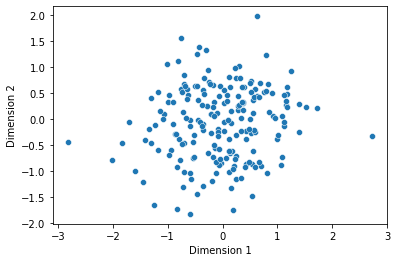

In [2]:
sns.scatterplot(data=X, x="Dimension 1", y="Dimension 2")

Ahora vamos a usar DBSCAN para encontrar _clusters_.

In [3]:
from sklearn.cluster import DBSCAN

# Usamos DBSCAN señalando que queremos un epsilon de 0.3 y un minimo de vecindad igual a 5
dbscan = DBSCAN(eps=0.3, min_samples=5)
y_pred = dbscan.fit_predict(X)
y_pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

Ahora vamos a visualizar los _clusters_.

In [4]:
y = pd.DataFrame(y_pred, columns=["Cluster"])
X_cluster = X.join(y)
X_cluster

,Dimension 1,Dimension 2,Cluster
0,0.274190,0.170773,0
1,1.391262,-0.253586,0
2,-0.819992,1.110365,0
3,-0.706964,-1.019086,0
4,0.062713,-0.738945,0
...,...,...,...
195,-0.782670,-0.783949,0
196,0.670486,-0.831067,0
197,-0.968154,-0.692877,0
198,0.956968,0.013491,0


<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

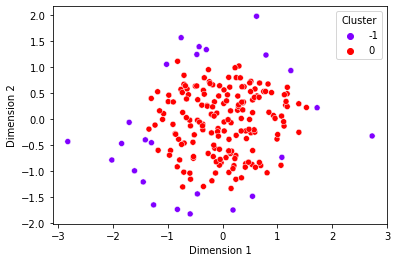

In [5]:
sns.scatterplot(data=X_cluster, x="Dimension 1", y="Dimension 2", hue="Cluster", palette="rainbow")

Prueba cambiando las distintas configuraciones de `eps` y `min_samples` para ver los distintos _clusters_. Recuerda que los _outliers_ quedan en el _cluster_ $-1$.

## GMM

Este método asume que tenemos _clusters_ que provienen de una distribución Gausiana (generalizada para más de una dimensión). No vamos a discutir cómo encontrar el número de _clusters_ ni los detalles técnicos, pero si la idea es visualizar las distribuciones asociadas a cada _cluster_. Vamos a partir creando un _dataset_ que tiene 3 clusters.

In [6]:
clusters = make_blobs(
    n_samples=200,
    centers=[(0, 0), (3, 1), (4, 7)], 
    cluster_std=[0.3, 0.5, 0.7]
)
X = pd.DataFrame(clusters[0], columns=["Dimension 1", "Dimension 2"])
X

,Dimension 1,Dimension 2
0,2.981859,0.794716
1,-0.666079,0.532708
2,0.286969,-0.176572
3,0.134354,0.668812
4,3.008798,0.855746
...,...,...
195,2.892336,0.716052
196,2.845251,0.761096
197,3.141324,0.419485
198,-0.147540,-0.366241


Vamos a visualizar el _dataset_.

<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

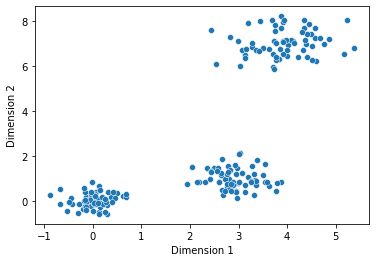

In [7]:
import seaborn as sns

sns.scatterplot(data=X, x="Dimension 1", y="Dimension 2")

Ahora vamos a entrenar un modelo GMM para hacer _clustering_ del _dataset_.

In [8]:
from sklearn.mixture import GaussianMixture

# Sabemos de antemano que tenemos 3 clusters
gm = GaussianMixture(n_components=3, n_init=8)
gm.fit(X)

GaussianMixture(n_components=3, n_init=8)

Ahora vamos a predecir y vamos a visualizar los _clusters_.

In [9]:
# Primero vemos las probabilidades de pertenencia de cada elemento
# a cada cluster. A diferencia de K-Means, GMM permite pertenencias parciales.

gm.predict_proba(X)

array([[2.59966717e-021, 5.12237523e-025, 1.00000000e+000],
       [1.00000000e+000, 3.00838564e-033, 2.64442373e-016],
       [1.00000000e+000, 7.01335749e-037, 4.60298753e-012],
       [1.00000000e+000, 4.34487132e-030, 2.27553648e-010],
       [7.49561840e-022, 1.42724898e-024, 1.00000000e+000],
       [5.64313003e-139, 1.00000000e+000, 2.02651814e-044],
       [1.00000000e+000, 1.32019247e-039, 5.73893928e-014],
       [9.73177877e-162, 1.00000000e+000, 1.39953986e-053],
       [9.31725353e-106, 1.00000000e+000, 4.41212686e-030],
       [1.17499119e-113, 1.00000000e+000, 1.78986099e-035],
       [1.59815181e-130, 1.00000000e+000, 3.34288305e-043],
       [3.65666602e-180, 1.00000000e+000, 5.81934286e-063],
       [1.97582069e-008, 1.99538256e-024, 9.99999980e-001],
       [3.58153729e-034, 4.10812356e-024, 1.00000000e+000],
       [6.04357798e-156, 1.00000000e+000, 1.23805781e-052],
       [5.27961700e-020, 1.82688764e-027, 1.00000000e+000],
       [1.00000000e+000, 1.13854213e-032

In [10]:
# Y ahora vamos a predecir

y_pred = gm.predict(X)
y_clusters = pd.DataFrame(y_pred, columns=["Cluster"])
y_clusters

,Cluster
0,2
1,0
2,0
3,0
4,2
...,...
195,2
196,2
197,2
198,0


In [11]:
# Ahora a visualizar

df = X.join(y_clusters)
df

,Dimension 1,Dimension 2,Cluster
0,2.981859,0.794716,2
1,-0.666079,0.532708,0
2,0.286969,-0.176572,0
3,0.134354,0.668812,0
4,3.008798,0.855746,2
...,...,...,...
195,2.892336,0.716052,2
196,2.845251,0.761096,2
197,3.141324,0.419485,2
198,-0.147540,-0.366241,0


<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

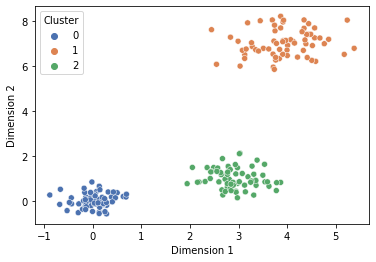

In [12]:
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Cluster", palette="deep")

Como vemos, cada punto pertenece al _cluster_ que teenía una mayor probabilidad. Sin embargo, recordemos que este método sirve para hacer _soft clustering_, es decir, al revisar las probabilidades podemos entender que un punto podría pertenecer a más de un _cluster_ a la vez.

## Graficando las distribuciones

Ahora vamos a graficar las distribuciones de probabilidad. La idea es visualizar en qué zonas la función de densidad de probabilidad es mayor. Ojo, esto ocurre en los centros, donde se ubican las medias de las distribuciones gausianas.

**Ojo**: la función de más abajo, `score_samples` estima el logaritmo de la función de densidad de probabilidad en el punto. Para obtener el valor de la densidad, debemos usar la función exponencial.

In [13]:
# Para obtener la densidad de probabilidad en cada punto hacemos esto
proba = gm.score_samples(X)
proba

array([-1.34651471, -4.72764969, -1.25256704, -2.67352788, -1.29627843,
       -1.94618042, -2.24012867, -2.39937033, -3.56435713, -3.02199965,
       -3.17535324, -3.98967591, -4.31113159, -3.80156688, -2.41996709,
       -2.07035233, -1.34190442, -3.80171786, -3.72398439, -0.76764593,
       -2.34783282, -0.98146804, -0.73208133, -2.08201993, -5.05217376,
       -1.25974745, -1.96888977, -1.96443682, -2.93055518, -0.595912  ,
       -0.82238966, -3.6399711 , -2.9346507 , -0.96442078, -0.73258152,
       -3.09460209, -2.589437  , -3.60699204, -2.20125685, -2.68670833,
       -2.19313355, -2.4820836 , -0.82998867, -2.46063624, -2.61658206,
       -0.87021754, -0.63009282, -5.48348787, -2.25771378, -1.31874506,
       -1.45053686, -0.68713703, -2.48965248, -2.21407761, -2.74590077,
       -2.65076015, -3.79341214, -1.19439305, -2.36211817, -3.14566216,
       -1.82198116, -1.07364623, -1.98462521, -1.76179669, -5.30422805,
       -1.93174536, -1.90715625, -1.77435318, -4.69744195, -1.33

<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

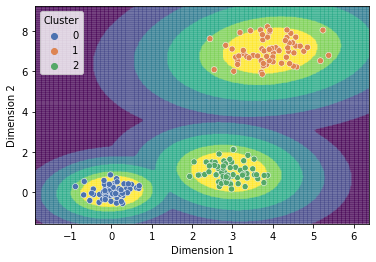

In [14]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

pallete_back = sns.color_palette("viridis", as_cmap=True)

x_min, x_max = X["Dimension 1"].min() - 1, X["Dimension 1"].max() + 1
y_min, y_max = X["Dimension 2"].min() - 1, X["Dimension 2"].max() + 1

# Generamos las combinaciones de x/y del plano en los rangos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

proba = gm.score_samples(np.c_[xx.ravel(), yy.ravel()])
proba = np.exp(proba)

p_20 = np.percentile(proba, 20)
p_40 = np.percentile(proba, 40)
p_60 = np.percentile(proba, 60)
p_80 = np.percentile(proba, 80)
p_90 = np.percentile(proba, 90)

proba_copy = np.zeros(len(proba))
for i in range(len(proba)):
    if proba[i] <= p_20:
        proba_copy[i] = 0
    elif proba[i] <= p_40:
        proba_copy[i] = 1
    elif proba[i] <= p_60:
        proba_copy[i] = 2
    elif proba[i] <= p_80:
        proba_copy[i] = 3
    elif proba[i] <= p_90:
        proba_copy[i] = 4
    else:
        proba_copy[i] = 5
    
        
Z = proba_copy.reshape(xx.shape)
plt.figure()

plt.pcolormesh(xx, yy, Z, cmap=pallete_back, shading='auto', alpha=0.2)
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="Cluster", palette="deep")

De esta forma podemos entender las zonas donde cada una de las distribuciones tiene un mayor valor en su función de densidad, que es el lugar donde está la media. De la misma forma, para detectar **outliers**, podemos ver los elementos que están en zonas de baja densidad.

## KNN

Ahora vamos a usar el modelo de `KNN` implementado por Scikit Learn. Luego vamos a computar las distancias de cada punto a sus vecinos.

In [15]:
clusters = make_blobs(
    n_samples=70,
    centers=[(0, 0)], 
    cluster_std=[0.1]
)
X = pd.DataFrame(clusters[0], columns=["Dimension 1", "Dimension 2"])
X

,Dimension 1,Dimension 2
0,0.026842,-0.115312
1,-0.129541,0.060244
2,-0.011251,0.246894
3,-0.056800,-0.057867
4,-0.228742,0.009565
...,...,...
65,0.133031,0.081833
66,-0.171308,-0.056976
67,0.049308,-0.208307
68,0.100677,-0.143051


<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

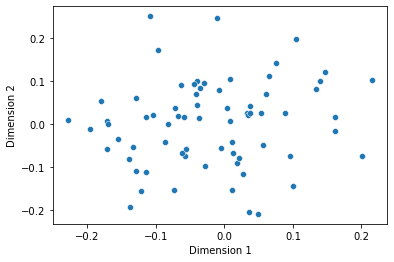

In [16]:
sns.scatterplot(data=X, x="Dimension 1", y="Dimension 2")

In [17]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors = 3)
knn.fit(X)

NearestNeighbors(n_neighbors=3)

Ahora vamos a mostrar para cada punto del _dataset_ la distancia a sus 5 puntos más cercanos, junto con el _id_ de aquellos puntos.

In [18]:
distances, indexes = knn.kneighbors(X)

In [19]:
df_distances = pd.DataFrame(distances, columns=["p1", "p2", "p3"])
df_distances

,p1,p2,p3
0,0.0,0.027371,0.036727
1,0.0,0.046318,0.046899
2,0.0,0.098154,0.113838
3,0.0,0.010965,0.014852
4,0.0,0.038124,0.056803
...,...,...,...
65,0.0,0.019817,0.041302
66,0.0,0.026912,0.038359
67,0.0,0.014577,0.067045
68,0.0,0.070675,0.078874


Ojo, el punto más cercano a cada elemento es el mismo punto, por eso la distancia es 0. Ahora veremos para cada punto cuáles son sus vecinos más cercanos.

In [20]:
df_indexes = pd.DataFrame(indexes, columns=["p1", "p2", "p3"])
df_indexes

,p1,p2,p3
0,0,27,34
1,1,35,19
2,2,51,15
3,3,26,13
4,4,25,16
...,...,...,...
65,65,44,18
66,66,62,64
67,67,50,24
68,68,21,0


Por ejemplo, para el punto 0, el más cercano es el mismo a distancia 0, luego viene el punto de la columna `p2`, y luego el de la columna `p3`. Sacaremos el promedio de cada una de las filas.

In [21]:
mean_distances = df_distances.mean(axis=1)
mean_distances

0     0.021366
1     0.031073
2     0.070664
3     0.008606
4     0.031642
        ...   
65    0.020373
66    0.021757
67    0.027207
68    0.049850
69    0.010379
Length: 70, dtype: float64

**Ojo**: puedes intentar lo mismo con `max` en vez de `mean`.

Ahora vamos a ver el percentil 90 y clasificar como outlier todo punto sobre ese valor. Ver el percentil 90 significa que clasificaremos como outlier el 10% de los valores cuyo promedio de distancia a sus $k$ vecinos más cercanos es mayor.

In [22]:
p_90 = np.percentile(mean_distances, 90)

Construiremos una DataFrame con este filtro para hacerle join con los datos.

In [23]:
X_outlier = pd.DataFrame(mean_distances >= p_90, columns=["is_outlier"])
df = X.join(X_outlier)
df

,Dimension 1,Dimension 2,is_outlier
0,0.026842,-0.115312,False
1,-0.129541,0.060244,False
2,-0.011251,0.246894,True
3,-0.056800,-0.057867,False
4,-0.228742,0.009565,False
...,...,...,...
65,0.133031,0.081833,False
66,-0.171308,-0.056976,False
67,0.049308,-0.208307,False
68,0.100677,-0.143051,True


<AxesSubplot:xlabel='Dimension 1', ylabel='Dimension 2'>

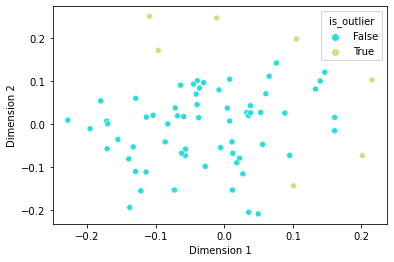

In [24]:
sns.scatterplot(data=df, x="Dimension 1", y="Dimension 2", hue="is_outlier", palette="rainbow")

Como vemos, los puntos más alejados de todos los demás son los _outliers_.

## Métodos de distancia

Ahora vamos a graficar un _dataset_ que tiene una varianza distinta en ambos ejes.

In [25]:
import matplotlib.pyplot as plt

clusters = make_blobs(
    n_samples=100,
    centers=[(0, 0)], 
    cluster_std=[(0.7, 0.2)]
)
X = pd.DataFrame(clusters[0], columns=["Dimension 1", "Dimension 2"])

# Vamos a setear el último punto a mano, para ver la diferencia entre las distancias
X.iloc[99] = [0, 1]
X

,Dimension 1,Dimension 2
0,0.186003,-0.042467
1,-0.514238,0.171452
2,1.442914,-0.132869
3,0.480586,-0.005033
4,-0.651287,-0.082283
...,...,...
95,-0.243403,-0.289623
96,-1.219340,0.025680
97,-0.496485,0.097054
98,0.355907,-0.012086


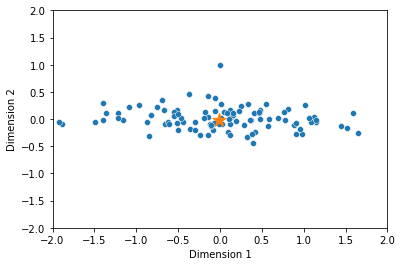

In [26]:
plt.xlim(-2, 2)
plt.ylim(-2, 2)

sns.scatterplot(data=X, x="Dimension 1", y="Dimension 2")
X_mean = X.mean()
plt.scatter(X_mean["Dimension 1"], X_mean["Dimension 1"], marker="*", s=200)

Aquí graficamos con una estrella la media de los datos. Ahora vamos a calcular la distancia euclidanea y de mahalanobis de cada punto a la media.

In [27]:
cov = np.cov(X["Dimension 1"], X["Dimension 2"], ddof=0)
cov

array([[ 0.60381266, -0.01599863],
       [-0.01599863,  0.04172309]])

In [28]:
cov_inv = np.linalg.inv(cov)
cov_inv

array([[ 1.67314167,  0.6415628 ],
       [ 0.6415628 , 24.21355018]])

In [29]:
from scipy.spatial import distance

euclidean = []

for row in X.values:
    dist_eucl = distance.euclidean(
        row, 
        [X_mean["Dimension 1"], X_mean["Dimension 2"]]
    )
    euclidean.append(dist_eucl)

euclidean = np.array(euclidean)
euclidean

array([0.20837852, 0.52408842, 1.4656153 , 0.49656016, 0.6421417 ,
       0.49979833, 1.54671232, 0.26051832, 0.16168561, 0.43993424,
       0.46979246, 0.10914551, 0.70578243, 0.50293567, 0.35510938,
       1.16033738, 0.84161449, 0.60858722, 0.27131373, 0.14792976,
       0.7989989 , 1.2045775 , 1.38516946, 0.60945548, 0.55226156,
       0.38781623, 0.88714508, 1.03053123, 0.91106903, 0.42514751,
       1.08906801, 0.13069693, 0.19552854, 0.61011245, 0.3217014 ,
       0.60495119, 1.13432972, 0.85840794, 0.5808824 , 1.14631382,
       1.10647269, 0.03018482, 0.13477618, 1.40645378, 0.21861158,
       0.78706663, 0.06162902, 0.28385251, 0.33518697, 0.32815006,
       0.16936445, 0.10527609, 0.1797002 , 0.61961486, 0.10198081,
       0.14554779, 0.81202806, 0.49427729, 0.20919056, 1.60997929,
       0.38166317, 0.49669631, 0.44082991, 0.29398902, 1.16093546,
       1.69221785, 0.18605275, 0.45445567, 1.34738806, 0.12898768,
       0.53629362, 2.06445949, 0.98823437, 1.87827113, 1.47451

In [30]:
mahalanobis = []

for row in X.values:
    dist_mah = distance.mahalanobis(
        row,
        [X_mean["Dimension 1"], X_mean["Dimension 2"]], 
        cov_inv
    )
    mahalanobis.append(dist_mah)

mahalanobis = np.array(mahalanobis)
mahalanobis

array([0.34690726, 0.97277527, 1.94549763, 0.63879398, 0.977394  ,
       1.2569454 , 2.08419957, 1.27849715, 0.4822568 , 2.05469811,
       1.6418643 , 0.49241625, 0.91499567, 0.77165812, 1.22462624,
       1.49704776, 1.43920948, 2.24612204, 1.20503152, 0.68812074,
       1.02840856, 1.57688413, 1.80716401, 0.87284386, 0.86886629,
       1.08102205, 1.97858911, 1.78347968, 1.26443337, 0.64089618,
       1.64448009, 0.20168785, 0.57012375, 0.97120573, 1.47618407,
       0.77895439, 1.48263362, 1.17834775, 2.25097535, 1.50495583,
       1.42944187, 0.07366003, 0.47869784, 2.13793064, 1.04273441,
       1.19987433, 0.28896004, 0.78060169, 1.50783032, 0.70306663,
       0.70765593, 0.51815798, 0.24057608, 1.54121463, 0.43594845,
       0.23782095, 1.07245437, 0.83724078, 0.81387601, 2.18214191,
       1.85750056, 1.46835607, 1.4024983 , 0.53558409, 1.49502717,
       2.42859136, 0.40677613, 0.58468956, 1.75591273, 0.17822969,
       0.70848005, 3.10738192, 1.48767254, 2.53603935, 1.95325

Ahora veremos el percentil 90 para ambos casos, y veremos los _outliers_. Primero con distancia euclidiana.

In [31]:
p_90_euc = np.percentile(euclidean, 90)
df_euclidean = pd.DataFrame(euclidean >= p_90_euc, columns=["is_outlier"])
df_outlier = X.join(df_euclidean)

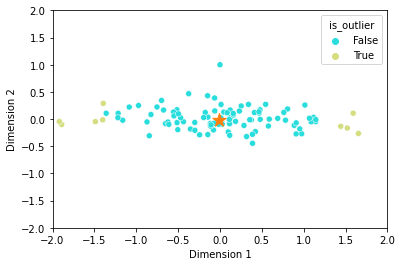

In [32]:
plt.xlim(-2, 2)
plt.ylim(-2, 2)

sns.scatterplot(data=df_outlier, x="Dimension 1", y="Dimension 2", hue="is_outlier", palette="rainbow")
plt.scatter(X_mean["Dimension 1"], X_mean["Dimension 1"], marker="*", s=200)

Ahora con distancia mahalanobis.

In [33]:
p_90_mah = np.percentile(mahalanobis, 90)
df_mahalanobis = pd.DataFrame(mahalanobis >= p_90_mah, columns=["is_outlier"])
df_outlier = X.join(df_mahalanobis)

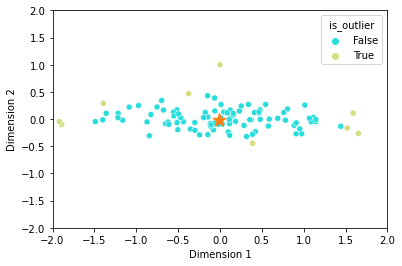

In [34]:
plt.xlim(-2, 2)
plt.ylim(-2, 2)

sns.scatterplot(data=df_outlier, x="Dimension 1", y="Dimension 2", hue="is_outlier", palette="rainbow")
plt.scatter(X_mean["Dimension 1"], X_mean["Dimension 1"], marker="*", s=200)